<a href="https://colab.research.google.com/github/ekoly/DS-Unit-1-Build/blob/master/ipynb/explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)

In [90]:
# retrieved from https://www.kaggle.com/rajeevw/ufcdata
# on 11/15/2019
dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/data.csv")
dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [0]:
red = [s for s in dat_df.columns if s.startswith("R_")]
blue = [s for s in dat_df.columns if s.startswith("B_")]

In [92]:
dat_df[red].groupby("R_fighter").agg("mean")

,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age
R_fighter,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Phillips,1.000000,0.000000,0.0,14.000000,12.000000,6.000000,3.000000,26.000000,9.000000,8.000000,6.000000,23.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,40.000000,18.000000,0.450000,1.000000,0.000000,0.000000,0.000000,137.000000,109.000000,0.000000,1.000000,13.000000,8.000000,6.000000,4.000000,31.000000,12.000000,31.000000,21.000000,53.000000,28.000000,0.000000,2.000000,1.000000,7.000000,1.000000,68.000000,37.000000,0.540000,1.000000,8.000000,5.000000,0.620000,129.000000,95.000000,3.00,900.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,175.26,177.80,135.0,25.000000
Aaron Riley,1.250000,0.000000,0.0,13.395833,11.000000,22.968750,13.677083,64.197917,21.156250,2.958333,2.166667,63.791667,16.843750,0.000000,12.937500,9.156250,0.718750,0.000000,90.125000,37.000000,0.394479,0.260417,2.718750,0.895833,0.306354,119.270833,64.031250,0.750000,3.500000,12.958333,10.812500,21.947917,12.416667,78.229167,26.635417,5.364583,2.750000,88.614583,28.729167,0.395833,3.968750,2.260417,0.000000,0.000000,105.541667,41.802083,0.392813,0.000000,3.052083,1.729167,0.244792,121.031250,56.968750,10.50,585.604167,0.0,0.0,0.000,1.500000,0.000000,0.000000,0.0,1.500000,172.72,175.26,155.0,29.000000
Aaron Rosa,1.000000,0.000000,0.0,16.000000,13.000000,19.000000,11.000000,160.000000,62.000000,0.000000,0.000000,158.000000,56.000000,0.000000,5.000000,4.000000,0.000000,0.000000,179.000000,73.000000,0.400000,0.000000,1.000000,0.000000,0.000000,258.000000,135.000000,0.000000,1.000000,19.000000,16.000000,27.000000,22.000000,154.000000,59.000000,7.000000,7.000000,146.000000,53.000000,0.000000,23.000000,19.000000,1.000000,0.000000,188.000000,88.000000,0.460000,0.000000,4.000000,1.000000,0.250000,304.000000,185.000000,3.00,686.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,193.04,198.12,205.0,28.000000
Aaron Simpson,0.250000,1.125000,0.0,9.433787,6.768481,16.586395,12.109127,32.247619,11.256406,15.888889,9.396202,47.773356,18.923753,0.620181,7.515760,7.069501,0.733107,0.000000,64.722902,32.761735,0.538778,0.240986,6.420181,2.510601,0.620871,93.132426,57.482426,2.250000,1.375000,3.974773,3.023639,17.064342,10.213209,33.774717,9.870918,1.459014,1.256293,43.471315,14.390476,0.000000,4.851984,3.926304,0.030159,0.068424,52.298073,21.340420,0.361684,0.208277,1.575737,0.301304,0.060827,64.855102,33.190703,12.25,507.185828,0.0,0.0,0.625,1.500000,1.625000,0.000000,0.0,3.750000,182.88,185.42,170.0,36.125000
Abdul Razak Alhassan,0.000000,1.500000,0.0,1.000000,0.625000,4.500000,3.375000,30.875000,12.625000,2.500000,1.875000,35.250000,16.250000,2.125000,1.625000,1.000000,0.000000,0.125000,37.875000,17.875000,0.495000,0.000000,0.375000,0.12500

In [93]:
# retrieved from https://www.kaggle.com/rajeevw/ufcdata
# on 11/15/2019
raw_dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/raw_total_fight_data.csv", sep=";")
raw_dat_df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64%,0%,11 of 17,0 of 3,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,7 of 13,0 of 1,1 of 1,0 of 1,3 of 3,0 of 1,5 of 8,0 of 3,0 of 0,0 of 0,6 of 9,0 of 0,KO/TKO,1,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100%,50%,4 of 4,16 of 20,1 of 2,0 of 0,50%,0%,2,0,0,0,0,0,1 of 1,1 of 4,0 of 0,1 of 1,0 of 0,2 of 3,0 of 0,1 of 1,0 of 0,1 of 1,1 of 1,2 of 6,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock
5141,Royce Gracie,Art Jimmerson,0,0,0 of 3,0 of 0,0%,0%,4 of 7,0 of 0,1 of 1,0 of 0,100%,0%,0,0,2,0,0,0,0 of 1,0 of 0,0 of 0,0 of 0,0 of 2,0 of 0,0 of 3,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,Submission,1,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie
5142,Kevin Rosier,Zane Frazier,2,0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,12 of 23,7 of 19,3 of 4,3 of 6,0 of 0,2 of 3,4 of 10,0 of 7,4 of 9,10 of 19,7 of 8,2 of 2,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier


In [94]:
# retrieved from https://www.kaggle.com/rajeevw/ufcdata
# on 11/15/2019
fighter_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/raw_fighter_details.csv")
fighter_df.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [95]:
fighter_df.isnull().sum()

fighter_name       0
Height           263
Weight            75
Reach           1744
Stance           874
DOB              740
dtype: int64

In [96]:
dat_df.pivot_table(values="R_avg_LEG_att", index="R_fighter")

,R_avg_LEG_att
R_fighter,
Aaron Phillips,3.000000
Aaron Riley,12.937500
Aaron Rosa,5.000000
Aaron Simpson,7.515760
Abdul Razak Alhassan,1.625000
...,...
Zach Makovsky,7.333333
Zak Cummings,5.597143
Zak Ottow,7.333333


In [98]:
# retrieved from https://docs.google.com/spreadsheets/d/1z3QX0uWXv-XHX2Nfuj6zZHrfEeXI3A9CKWkrGaBzB8s/edit#gid=0
# on 11/15/2019
sheet_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/ALL%20UFC%20FIGHTERS%202_23_2016%20SHERDOG.COM%20-%20Sheet1.csv")
sheet_df

,url,fid,name,nick,birth_date,height,weight,association,class,locality,country
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States
...,...,...,...,...,...,...,...,...,...,...,...
1556,/fighter/Thaddeus-Luster-30,30,Thaddeus Luster,NaN,NaN,75.0,200.0,NaN,Light Heavyweight,"Van Nuys, California",United States
1557,/fighter/Frank-Hamaker-29,29,Frank Hamaker,NaN,NaN,74.0,245.0,NaN,Heavyweight,Amsterdam,Netherlands
1558,/fighter/Ryan-Parker-119,119,Ryan Parker,NaN,NaN,75.0,235.0,NaN,Heavyweight,"Moorehead, Minnesota",United States
1559,/fighter/Marcus-Davis-8592,8592,Marcus Davis,The Irish Hand Grenade,8/24/1973,68.0,170.0,Team Irish,Welterweight,"Bangor, Maine",United States


In [99]:
sheet_df.dtypes

url             object
fid              int64
name            object
nick            object
birth_date      object
height         float64
weight         float64
association     object
class           object
locality        object
country         object
dtype: object

In [100]:
import re

year_re = re.compile(r"\d+\/\d+\/(?P<year>\d+)")
year_re.search("7/30/1977").group("year")

'1977'

In [101]:
def getYear(s):
    
    if not s or not isinstance(s, str):
        return np.NaN
    
    m = year_re.search(s)
    
    if not m:
        return np.NaN
    
    return np.int64(m.group("year"))


sheet_df["birth_year"] = sheet_df["birth_date"].apply(getYear)
sheet_df.head()

,url,fid,name,nick,birth_date,height,weight,association,class,locality,country,birth_year
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland,1988.0
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States,1987.0
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States,1981.0
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States,1985.0
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States,1986.0


In [0]:
sheet_df = sheet_df.replace("USA", "United States")
sheet_df = sheet_df.replace("Holland", "Netherlands")

In [103]:
sheet_df.isnull().sum()

url              0
fid              0
name             1
nick           509
birth_date     209
height          55
weight          28
association    195
class           35
locality        63
country         28
birth_year     209
dtype: int64

In [0]:
sheet_df["age_group"] = pd.cut(sheet_df["birth_year"], range(1965, 1995, 5), labels=range(1965, 1990, 5))

In [105]:
num_fighters_by_country = sheet_df.pivot_table(values="name", index=["country"], aggfunc=len)
top_countries = num_fighters_by_country.sort_values(by="name").tail(5).index
secondary_countries = num_fighters_by_country.sort_values(by="name").tail(15).head(10).index
top_countries

Index(['England', 'Japan', 'Canada', 'Brazil', 'United States'], dtype='object', name='country')

In [0]:
top = sheet_df[sheet_df["country"].isin(top_countries)]
secondary = sheet_df[sheet_df["country"].isin(secondary_countries)]

In [107]:
num_fighters_by_year = top.pivot_table(values="name", index=["age_group", "country"], aggfunc=len)
num_fighters_by_year

name
age_group country            
1965      Brazil           11
          Canada            4
          England           2
          Japan             6
          United States    40
1970      Brazil            9
          Canada            5
          England           2
          Japan             9
          United States    82
1975      Brazil           41
          Canada           19
          England          12
          Japan            14
          United States   173
1980      Brazil           68
          Canada           30
          England          13
          Japan            14
          United States   278
1985      Brazil           44
          Canada           11
          England          12
          Japan             7
          United States   159

In [0]:
num_fighters_by_year.columns = ["num_fighters"]

In [0]:
num_fighters_by_year = num_fighters_by_year.reset_index(level=["age_group", "country"])

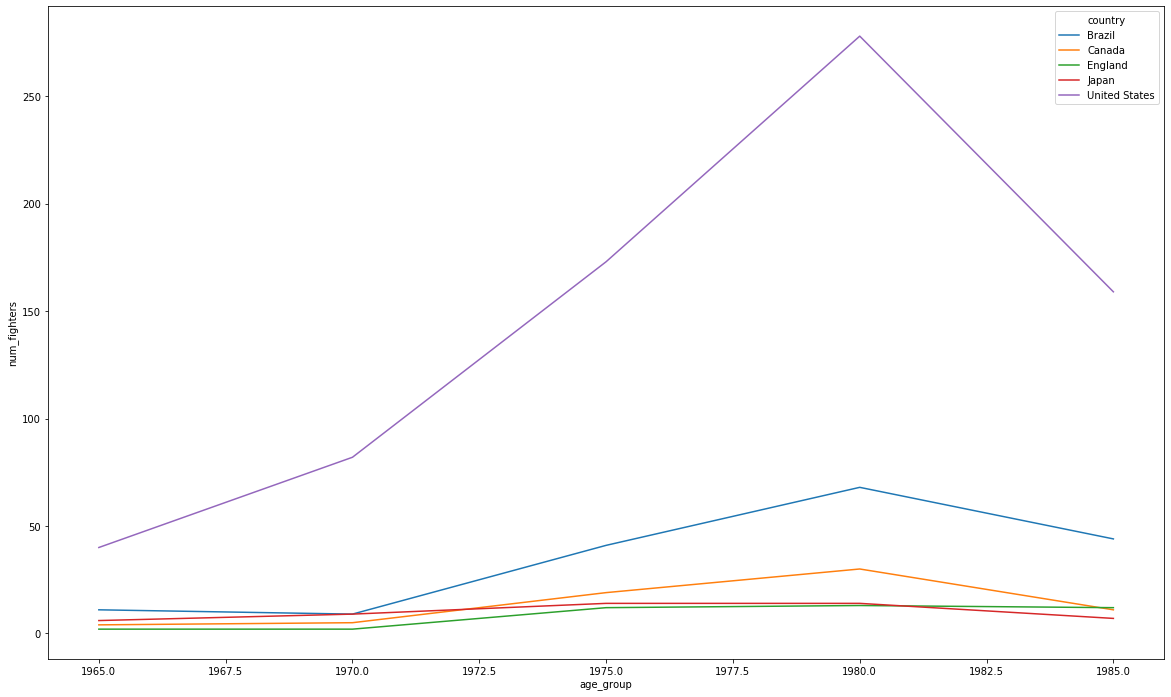

In [110]:
fig, ax = plt.subplots(figsize=(20, 12))


sns.lineplot(x=num_fighters_by_year["age_group"], y=num_fighters_by_year["num_fighters"], hue=num_fighters_by_year["country"], ax=ax)
#ax.set_ylim([0, 50])

/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


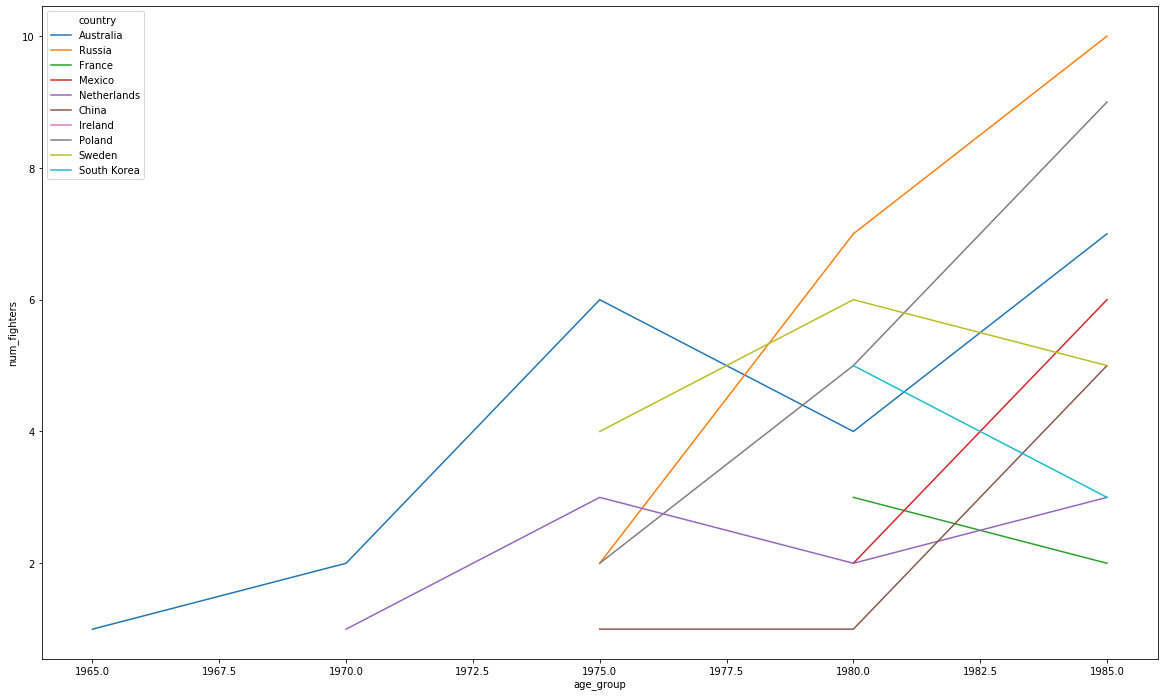

In [111]:
num_fighters_by_year = secondary.pivot_table(values="name", index=["age_group", "country"], aggfunc=len)
num_fighters_by_year.columns = ["num_fighters"]
num_fighters_by_year = num_fighters_by_year.reset_index(level=["age_group", "country"])

fig, ax = plt.subplots(figsize=(20, 12))


sns.lineplot(x=num_fighters_by_year["age_group"], y=num_fighters_by_year["num_fighters"], hue=num_fighters_by_year["country"], ax=ax)
#ax.set_ylim([0, 50])